### 📌 Partie 1 : Préparation des données

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

- Lecture du dataset brut

In [135]:
df = pd.read_csv("7_data_regression.csv",encoding="utf-8")

- Gestion des valeurs manquantes

In [136]:
# Variables numériques : médiane
df['superficie'] = df['superficie'].fillna(df['superficie'].median())
df['nombre_chambres'] = df['nombre_chambres'].fillna(df['nombre_chambres'].median())
df['loyer_mensuel'] = df['loyer_mensuel'].fillna(df['loyer_mensuel'].median())

# Variables catégorielles : mode ou valeur par défaut
df['douche_wc'] = df['douche_wc'].fillna(df['douche_wc'].mode()[0])
df['type_d_acces'] = df['type_d_acces'].fillna(df['type_d_acces'].mode()[0])
df['meuble'] = df['meuble'].fillna('non')
df['etat_general'] = df['etat_general'].fillna(df['etat_general'].mode()[0])

- Encodage des variables catégorielles

In [137]:
num_features = ['superficie', 'nombre_chambres']
cat_features = ['quartier', 'douche_wc', 'type_d_acces', 'meuble', 'etat_general']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ]
)

- Création de variables dérivées

In [138]:
# Prix par m²
df["prix_par_m2"] = df["loyer_mensuel"] / df["superficie"]

# Classification des quartiers
quartiers_residentiels = ["Ivandry", "Ankorondrano", "Ambatobe"]
df["quartier_type"] = df["quartier"].apply(
lambda x: "residentiel" if x in quartiers_residentiels else "populaire"
)

- Détection et suppression des variables fortement corrélées

In [139]:
X = df.drop('loyer_mensuel', axis=1)
y = df['loyer_mensuel']

all_numerique_cols = ['superficie', 'nombre_chambres', 'prix_par_m2']
all_cat_features = ['quartier', 'douche_wc', 'type_d_acces', 'meuble', 'etat_general','quartier_type']



- Standardisation et normalisation

### 📌 Partie 2 : Modélisation

- Séparation train/test

In [140]:
# Mise à jour du préprocesseur avec les nouvelles colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), all_numerique_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), all_cat_features)
    ])
X = df.drop("loyer_mensuel", axis=1)
y = df["loyer_mensuel"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Implémentation de la régression linéaire multiple

In [141]:
# Création du pipeline avec préprocesseur et modèle
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

- Évaluation : R², RMSE

In [142]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ RMSE :", rmse  )
print("✅ R² :", r2)

✅ RMSE : 66731.71585508293
✅ R² : 0.9754897765017883


Visualisation

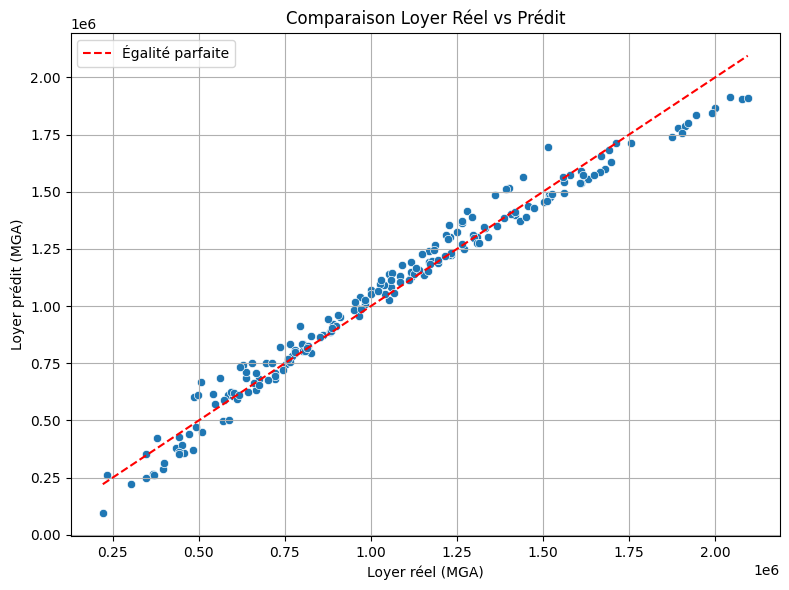

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Égalité parfaite")
plt.xlabel("Loyer réel (MGA)")
plt.ylabel("Loyer prédit (MGA)")
plt.title("Comparaison Loyer Réel vs Prédit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [144]:
# Comparer RMSE avec la moyenne et l’écart-type des loyers
print("Moyenne des loyers :", y_test.mean())
print("Écart-type des loyers :", y_test.std())
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score :", r2_score(y_test, y_pred))


Moyenne des loyers : 1049338.0
Écart-type des loyers : 427313.9941588856
RMSE : 66731.71585508293
R² Score : 0.9754897765017883
